In [4]:
!pip install tqdm
!pip install statsmodels


  Obtaining dependency information for statsmodels from https://files.pythonhosted.org/packages/6c/37/4815a8b7526c7c4493e58faf9606925514f6d7a735ef0a5b5cac5d43d643/statsmodels-0.14.0-cp312-cp312-macosx_10_9_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 6.2 MB/s eta 0:00:0000:0100:01m


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]


## Para sacar los componentes de la serie temporal
################################################################
from statsmodels.tsa.seasonal import seasonal_decompose


## Para calcular la estacionaridad de nuestras series temporales
################################################################
from statsmodels.tsa.stattools import adfuller

## Para calcular la autocorrelación en la serie temporal
################################################################
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

## Para ajustar los modelos predictivos
################################################################
from statsmodels.tsa.arima.model import ARIMA
from itertools import product

## Para las metricas del modelo
################################################################
from sklearn.metrics import mean_squared_error

## Para ignorar los warnings
################################################################
import warnings
warnings.filterwarnings("ignore")


In [7]:
df = pd.read_csv("resumen_gastos.csv")
df.head()

,Mes,efectivo,gasolina,movimientos_interno,restaurantes,seguros,colegios,gym,comida,movil_internet,...,hipoteca,impuestos,limpieza,viajes,ocio,Gastos/ingreso_oli,MJ,loteria,coche,oposiciones
0,Oct-2012,20.0,68.43,10.0,0.00,0.00,0.0,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Nov-2012,170.0,254.80,20.0,58.95,333.23,276.0,89.53,232.84,70.28,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Dec-2012,580.0,167.13,1400.0,0.00,83.42,0.0,89.53,626.23,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Jan-2013,100.0,168.60,30.7,83.73,175.55,0.0,89.53,391.25,44.65,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Feb-2013,80.0,232.84,676.6,270.47,562.75,0.0,89.53,313.01,111.20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
df.dtypes

Mes                                 object
efectivo                           float64
gasolina                           float64
movimientos_interno                float64
restaurantes                       float64
seguros                            float64
colegios                           float64
gym                                float64
comida                             float64
movil_internet                     float64
indefinido                         float64
parking                            float64
casa                               float64
ong                                float64
terapiasOli                        float64
agua                               float64
farmacia                           float64
pago_con_tarjeta                   float64
energia                            float64
moda                               float64
belleza                            float64
Transferencia emitida periódica    float64
gastos_varios                      float64
tarjetas   

In [9]:
df.index = pd.to_datetime(df["Mes"])
df.head()

,Mes,efectivo,gasolina,movimientos_interno,restaurantes,seguros,colegios,gym,comida,movil_internet,...,hipoteca,impuestos,limpieza,viajes,ocio,Gastos/ingreso_oli,MJ,loteria,coche,oposiciones
Mes,,,,,,,,,,,,,,,,,,,,,
2012-10-01,Oct-2012,20.0,68.43,10.0,0.00,0.00,0.0,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-11-01,Nov-2012,170.0,254.80,20.0,58.95,333.23,276.0,89.53,232.84,70.28,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-12-01,Dec-2012,580.0,167.13,1400.0,0.00,83.42,0.0,89.53,626.23,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-01-01,Jan-2013,100.0,168.60,30.7,83.73,175.55,0.0,89.53,391.25,44.65,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-02-01,Feb-2013,80.0,232.84,676.6,270.47,562.75,0.0,89.53,313.01,111.20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
df.index

DatetimeIndex(['2012-10-01', '2012-11-01', '2012-12-01', '2013-01-01',
               '2013-02-01', '2013-03-01', '2013-04-01', '2013-05-01',
               '2013-06-01', '2013-07-01',
               ...
               '2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01',
               '2023-05-01', '2023-06-01', '2023-07-01', '2023-08-01',
               '2023-09-01', '2023-10-01'],
              dtype='datetime64[ns]', name='Mes', length=131, freq=None)

In [11]:
df.index.freq = pd.infer_freq(df.index)
df.index

DatetimeIndex(['2012-10-01', '2012-11-01', '2012-12-01', '2013-01-01',
               '2013-02-01', '2013-03-01', '2013-04-01', '2013-05-01',
               '2013-06-01', '2013-07-01',
               ...
               '2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01',
               '2023-05-01', '2023-06-01', '2023-07-01', '2023-08-01',
               '2023-09-01', '2023-10-01'],
              dtype='datetime64[ns]', name='Mes', length=131, freq=None)

In [12]:
df.head()

,Mes,efectivo,gasolina,movimientos_interno,restaurantes,seguros,colegios,gym,comida,movil_internet,...,hipoteca,impuestos,limpieza,viajes,ocio,Gastos/ingreso_oli,MJ,loteria,coche,oposiciones
Mes,,,,,,,,,,,,,,,,,,,,,
2012-10-01,Oct-2012,20.0,68.43,10.0,0.00,0.00,0.0,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-11-01,Nov-2012,170.0,254.80,20.0,58.95,333.23,276.0,89.53,232.84,70.28,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-12-01,Dec-2012,580.0,167.13,1400.0,0.00,83.42,0.0,89.53,626.23,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-01-01,Jan-2013,100.0,168.60,30.7,83.73,175.55,0.0,89.53,391.25,44.65,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-02-01,Feb-2013,80.0,232.84,676.6,270.47,562.75,0.0,89.53,313.01,111.20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
df.drop("Mes",  inplace = True, axis = 1)

In [14]:
df.head()

,efectivo,gasolina,movimientos_interno,restaurantes,seguros,colegios,gym,comida,movil_internet,indefinido,...,hipoteca,impuestos,limpieza,viajes,ocio,Gastos/ingreso_oli,MJ,loteria,coche,oposiciones
Mes,,,,,,,,,,,,,,,,,,,,,
2012-10-01,20.0,68.43,10.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-11-01,170.0,254.80,20.0,58.95,333.23,276.0,89.53,232.84,70.28,1740.80,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-12-01,580.0,167.13,1400.0,0.00,83.42,0.0,89.53,626.23,0.00,129.55,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-01-01,100.0,168.60,30.7,83.73,175.55,0.0,89.53,391.25,44.65,499.44,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-02-01,80.0,232.84,676.6,270.47,562.75,0.0,89.53,313.01,111.20,100.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
df.isnull().sum()

efectivo                           0
gasolina                           0
movimientos_interno                0
restaurantes                       0
seguros                            0
colegios                           0
gym                                0
comida                             0
movil_internet                     0
indefinido                         0
parking                            0
casa                               0
ong                                0
terapiasOli                        0
agua                               0
farmacia                           0
pago_con_tarjeta                   0
energia                            0
moda                               0
belleza                            0
Transferencia emitida periódica    0
gastos_varios                      0
tarjetas                           0
gastos_compras                     0
coches                             0
ahorro                             0
Moda                               0
G

In [17]:
nuevo_df = df.iloc[:, 0:1]

In [18]:
nuevo_df

,efectivo
Mes,
2012-10-01,20.0
2012-11-01,170.0
2012-12-01,580.0
2013-01-01,100.0
2013-02-01,80.0
...,...
2023-06-01,80.0
2023-07-01,0.0
2023-08-01,240.0


In [20]:
nuevo_df["año"] = nuevo_df.index.year
nuevo_df["mes"] = nuevo_df.index.month

In [21]:
nuevo_df

,efectivo,año,mes
Mes,,,
2012-10-01,20.0,2012,10
2012-11-01,170.0,2012,11
2012-12-01,580.0,2012,12
2013-01-01,100.0,2013,1
2013-02-01,80.0,2013,2
...,...,...,...
2023-06-01,80.0,2023,6
2023-07-01,0.0,2023,7
2023-08-01,240.0,2023,8


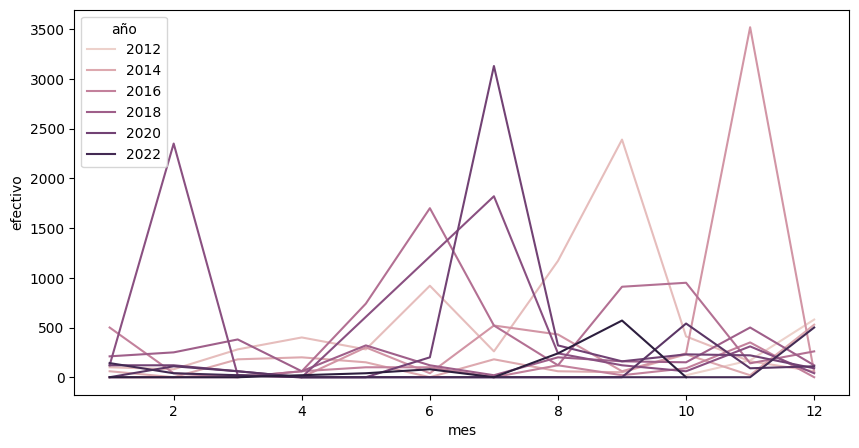

In [23]:
sns.lineplot(x = "mes", y = "efectivo", hue = "año", data = nuevo_df);

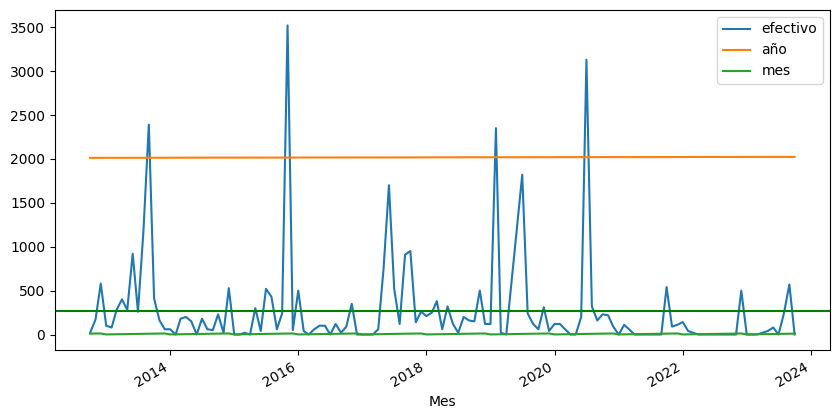

In [25]:
nuevo_df.plot()
plt.axhline(nuevo_df.efectivo.mean(), c = "g")

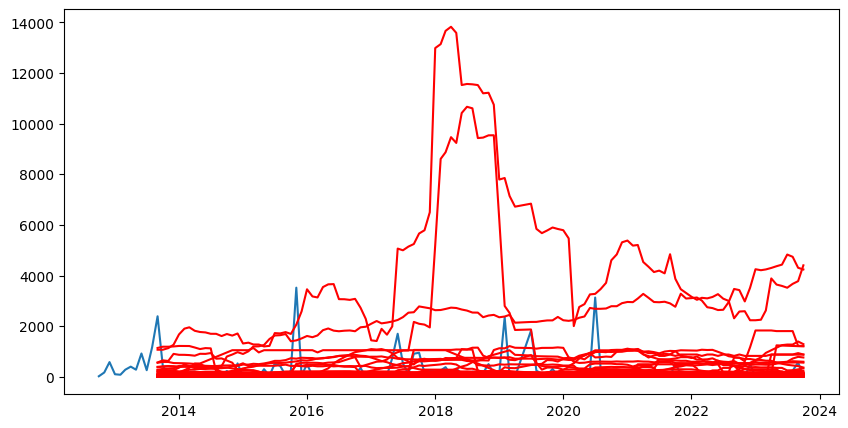

In [26]:
plt.plot(nuevo_df["efectivo"])
plt.plot(df.rolling(window= 12).mean(), c = "r")

In [27]:
res = adfuller(nuevo_df["efectivo"])
res

(-10.33103304369024,
 2.8421878271333675e-18,
 0,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 1805.4474492381526)

In [32]:
y_test = nuevo_df["efectivo"][-30:]
y_train = nuevo_df["efectivo"][:-30]

In [33]:
ps = range(5)
qs = range(7)

parametros = list(product(ps, qs))
print(parametros)

[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6)]


In [34]:
rmse = []
orden = []

for p, q in parametros:
    modelo = ARIMA(y_train, order = (p, 0, q)).fit()
    pred = modelo.predict(start = len(y_train), end = len(nuevo_df) -1)
    error = np.sqrt(np.mean(mean_squared_error(y_test, pred)))
    rmse.append(error)
    orden.append((p, q))

In [35]:
results = pd.DataFrame({"RMSE": rmse, "order": orden})
results.sort_values(by ="RMSE", ascending = True).head()

,RMSE,order
20,283.802667,"(2, 6)"
12,289.131112,"(1, 5)"
18,291.129882,"(2, 4)"
13,293.395373,"(1, 6)"
11,293.701185,"(1, 4)"


In [94]:
modelo = ARIMA(y_train, order = (12,0, 3) ).fit()
pred = modelo.predict(start = len(y_train), end = len(nuevo_df) -1)

In [95]:
y_test

Mes
2021-05-01      0.0
2021-06-01      0.0
2021-07-01      0.0
2021-08-01      0.0
2021-09-01      0.0
2021-10-01    540.0
2021-11-01     90.0
2021-12-01    110.0
2022-01-01    142.0
2022-02-01     40.0
2022-03-01     20.0
2022-04-01      0.0
2022-05-01      0.0
2022-06-01      0.0
2022-07-01      0.0
2022-08-01      0.0
2022-09-01      0.0
2022-10-01      0.0
2022-11-01      0.0
2022-12-01    500.0
2023-01-01      0.0
2023-02-01      0.0
2023-03-01      0.0
2023-04-01     20.0
2023-05-01     40.0
2023-06-01     80.0
2023-07-01      0.0
2023-08-01    240.0
2023-09-01    570.0
2023-10-01      0.0
Name: efectivo, dtype: float64

In [96]:
df_pred = pd.DataFrame(pred)
df_pred["real"] = y_test

In [97]:
df_pred.head()

,predicted_mean,real
101,220.413865,NaN
102,161.082507,NaN
103,334.181188,NaN
104,300.095978,NaN
105,305.311808,NaN


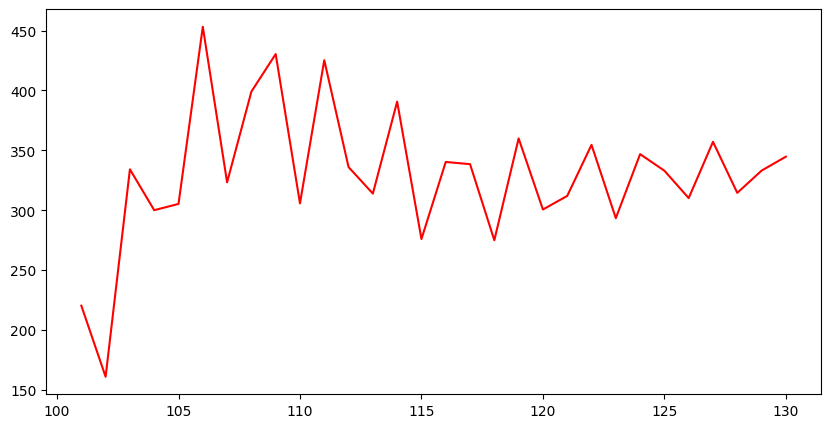

In [98]:
plt.plot(df_pred["predicted_mean"], c = "r")
plt.plot(df_pred["real"], c = "black");

In [99]:
pred_año = pd.DataFrame(modelo.predict(start = len(df), end = len(df) + 12))
pred_año

,predicted_mean
131,311.648783
132,346.027401
133,326.199430
134,322.039130
135,344.041269
136,316.215021
137,334.637540
138,333.178955
139,318.700525
140,340.026720


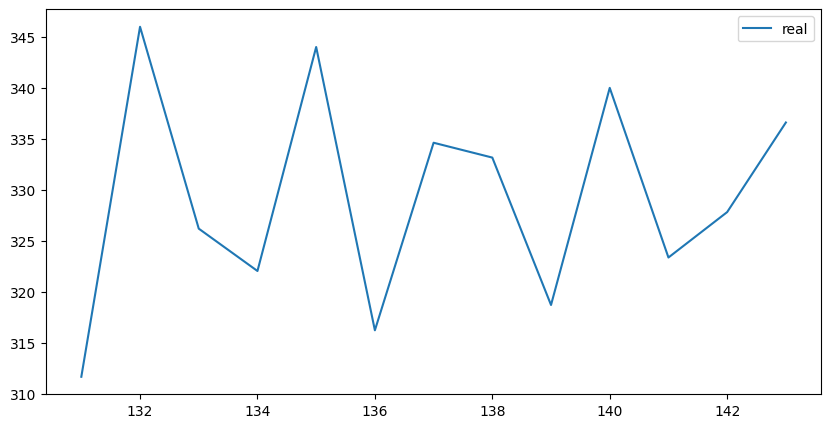

In [100]:
 #ploteamos los resultados

#plt.plot(nuevo_df.efectivo)
plt.plot(pred_año)
plt.legend(["real", "predicted"]);

In [101]:
pred_año

,predicted_mean
131,311.648783
132,346.027401
133,326.199430
134,322.039130
135,344.041269
136,316.215021
137,334.637540
138,333.178955
139,318.700525
140,340.026720


In [102]:
import pandas as pd

# Supongamos que pred_año es tu DataFrame
# Crea un rango de fechas al primer día de cada mes a partir de noviembre de 2023
fechas = pd.date_range(start='2023-11-01', periods=len(pred_año), freq='MS')

# Asigna las fechas como nuevo índice
pred_año.index = fechas


In [103]:
pred_año.columns = ['efectivo']

In [104]:
n_df = pd.concat([nuevo_df, pred_año])

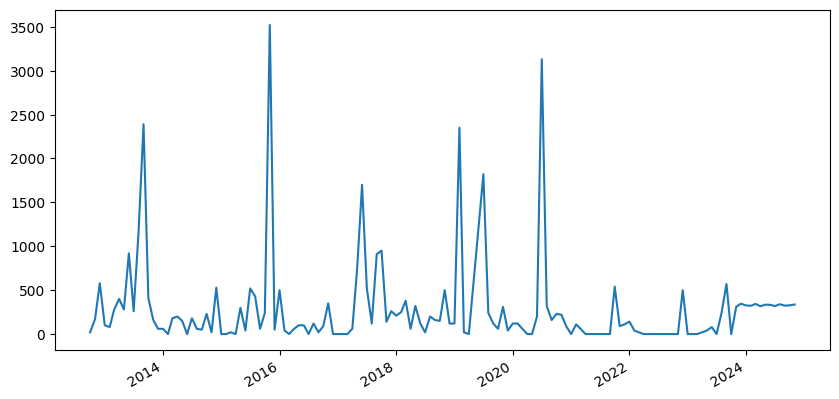

In [105]:
n_df.efectivo.plot();